# Sensitivity Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rc('text', usetex=False)
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

In [3]:
features_slide_landslide=np.load('Sample feature engineered data of Italy for testing/slide.npy')
features_dflow_landslide = np.load('Sample feature engineered data of Italy for testing/dflow.npy')
features_eflow_landslide = np.load('Sample feature engineered data of Italy for testing/eflow.npy')
features_complex_landslide=np.load('Sample feature engineered data of Italy for testing/complex.npy')
features_fall_landslide=np.load('Sample feature engineered data of Italy for testing/fall.npy')

In [5]:
color_slide=[253/255,141/255,60/255]
color_dflow=[44/255,123/255,182/255]
color_eflow= [190/255,174/255,212/255]
color_complex=[215/255,25/255,28/255]
color_fall=[171/255,217/255,233/255]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

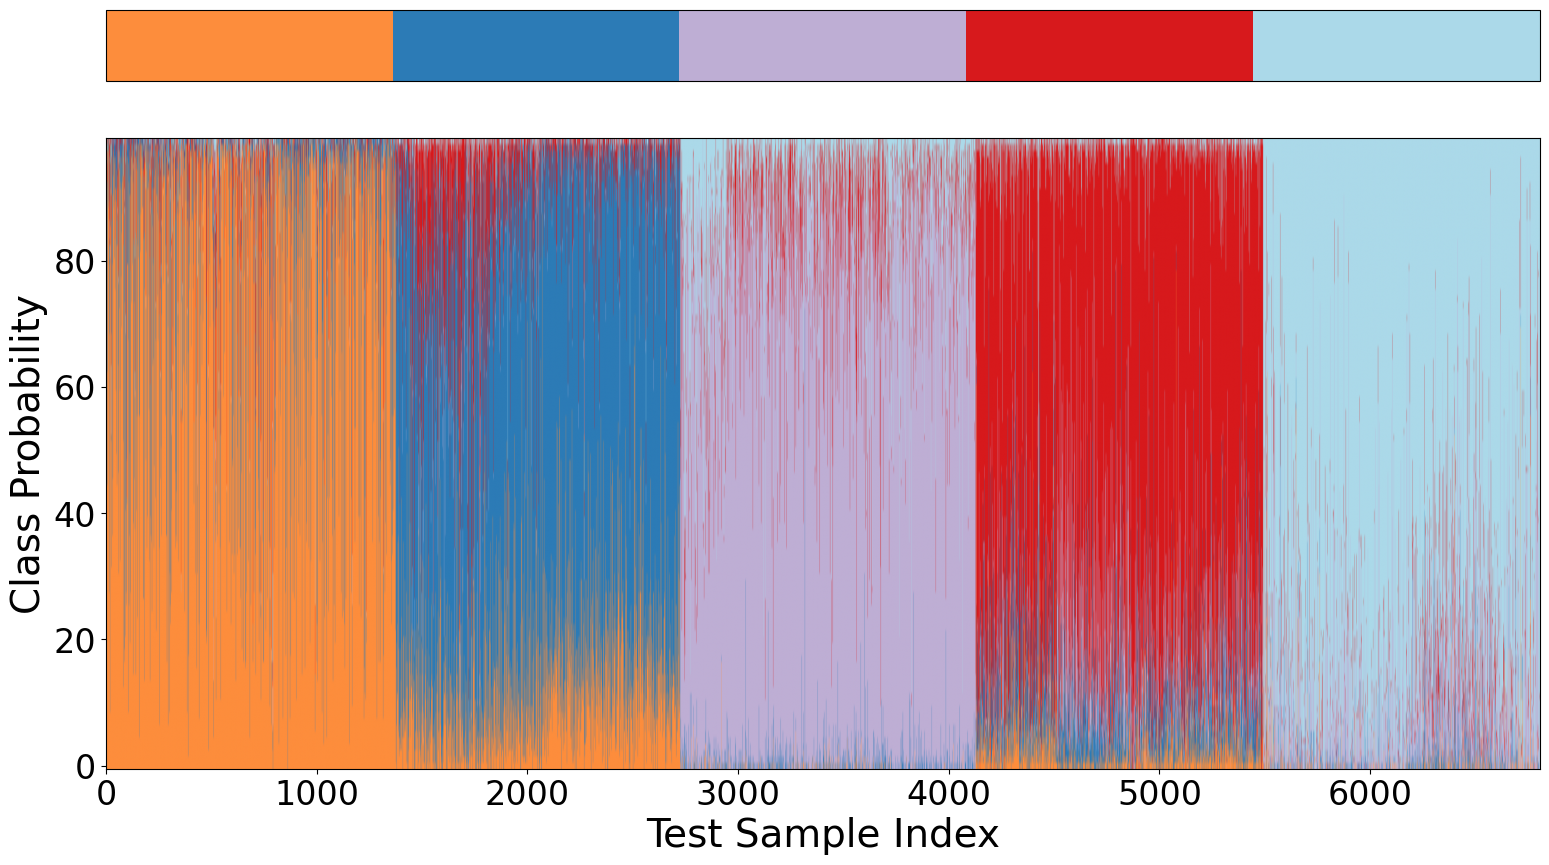

In [6]:
# Redefining the get_image_data function with corrected logic
def get_image_data(features_slide_landslide, features_dflow_landslide, features_eflow_landslide,
                   features_complex_landslide, features_fall_landslide, N):
    # Stacking the features
    data = np.vstack((features_slide_landslide[0:N], features_dflow_landslide[0:N], features_eflow_landslide[0:N],
                      features_complex_landslide[0:N], features_fall_landslide[0:N]))

    # Creating labels for each type of landslide
    label_slide_landslide = np.zeros((np.shape(features_slide_landslide[0:N])[0], 1))
    label_dflow_landslide = np.ones((np.shape(features_dflow_landslide[0:N])[0], 1))
    label_eflow_landslide = np.ones((np.shape(features_eflow_landslide[0:N])[0], 1)) * 2
    label_complex_landslide = np.ones((np.shape(features_complex_landslide[0:N])[0], 1)) * 3
    label_fall_landslide = np.ones((np.shape(features_fall_landslide[0:N])[0], 1)) * 4
    label = np.vstack((label_slide_landslide, label_dflow_landslide, label_eflow_landslide, label_complex_landslide,
                       label_fall_landslide))

    # Splitting the data
    Train, Test = [], []
    Trainlabel, Testlabel = [], []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(data):
        Train.append(data[train_index, :])
        Test.append(data[test_index, :])
        Trainlabel.append(label[train_index])
        Testlabel.append(label[test_index])

    # Classifying and constructing the image
    for k in range(1):
        Classifier = RandomForestClassifier(n_estimators=100, max_depth=None)
        scaler = StandardScaler()
        train_data = scaler.fit_transform(Train[k])
        test_data = scaler.transform(Test[k])
        Classifier.fit(train_data, np.ravel(Trainlabel[k]))
        imp_features = [7, 6, 12, 21, 22, 12]
        Classifier = RandomForestClassifier(n_estimators=100, max_depth=None)
        scaler = StandardScaler()
        train_data = scaler.fit_transform(Train[k][:, imp_features])
        test_data = scaler.transform(Test[k][:, imp_features])
        Classifier.fit(train_data, np.ravel(Trainlabel[k]))
        prob_ = Classifier.predict_proba(test_data)
        data = np.int32(np.asarray(prob_) * 100)
        image_data = np.zeros((100, len(data)))
        for i in range(len(data)):
            a1, b1, c1, d1 = data[i][0], data[i][0] + data[i][1], data[i][0] + data[i][1] + data[i][2], data[i][0] + data[i][1] + data[i][2] + data[i][3]
            image_data[0:a1, i] = 0
            image_data[a1:b1, i] = 1
            image_data[b1:c1, i] = 2
            image_data[c1:d1, i] = 3
            image_data[d1:100, i] = 4

        image = np.dstack((image_data, image_data, image_data))
        image[image_data[:, :] == 0] = [253, 141, 60]
        image[image_data[:, :] == 1] = [44, 123, 182]
        image[image_data[:, :] == 2] = [190, 174, 212]
        image[image_data[:, :] == 3] = [215, 25, 28]
        image[image_data[:, :] == 4] = [171, 217, 233]

        image = np.int32(image)
        return image

# Calling the corrected function
image_italy_corrected = get_image_data(
    features_slide_landslide, features_dflow_landslide, features_eflow_landslide,
    features_complex_landslide, features_fall_landslide, 13610)

# Plotting the corrected image
fig = plt.figure(dpi=100)
fig.set_size_inches(18.5, 10.5)
cm = mpl.colors.ListedColormap([color_slide, color_dflow, color_eflow, color_complex, color_fall])
pcm = plt.imshow(image_italy_corrected / 255, aspect='auto', cmap=cm, origin='lower')
cb = plt.colorbar(pcm, location='top', pad=0.07)
cb.set_ticks([])
plt.ylabel('Class Probability', fontsize=28)
plt.xlabel('Test Sample Index', fontsize=28)
# plt.savefig('Results/italy_subtype_resultfig.pdf')
plt.show()

In [7]:
def acc_train_samples(features_slide_landslide,features_dflow_landslide, features_eflow_landslide,features_complex_landslide,
                     features_fall_landslide):
    ACC_slide,ACC_dflow,ACC_eflow,ACC_complex,ACC_fall=[],[],[],[],[]
    for N in range(100,4000,100):
        np.random.shuffle(features_slide_landslide)
        np.random.shuffle(features_dflow_landslide)
        np.random.shuffle(features_eflow_landslide)
        np.random.shuffle(features_complex_landslide)
        np.random.shuffle(features_fall_landslide)
        ########################################################################################
        train_data=np.vstack((features_slide_landslide[0:N],features_dflow_landslide[0:N], features_eflow_landslide[0:N],
                        features_complex_landslide[0:N],features_fall_landslide[0:N]))

        label_slide_landslide=np.zeros((np.shape(features_slide_landslide[0:N])[0],1))
        label_dflow_landslide=np.ones((np.shape(features_dflow_landslide[0:N])[0],1))
        label_eflow_landslide=np.ones((np.shape(features_eflow_landslide[0:N])[0],1))*2
        label_complex_landslide=np.ones((np.shape(features_complex_landslide[0:N])[0],1))*3
        label_fall_landslide=np.ones((np.shape(features_fall_landslide[0:N])[0],1))*4

        train_label=np.vstack((label_slide_landslide,label_dflow_landslide,label_eflow_landslide,label_complex_landslide,
                    label_fall_landslide))  
        ##########################################################################################
        test_data=np.vstack((features_slide_landslide[N::],features_dflow_landslide[N::], features_eflow_landslide[N::],
                        features_complex_landslide[N::],features_fall_landslide[N::]))

        label_slide_landslide=np.zeros((np.shape(features_slide_landslide[N::])[0],1))
        label_dflow_landslide=np.ones((np.shape(features_dflow_landslide[N::])[0],1))
        label_eflow_landslide=np.ones((np.shape(features_eflow_landslide[N::])[0],1))*2
        label_complex_landslide=np.ones((np.shape(features_complex_landslide[N::])[0],1))*3
        label_fall_landslide=np.ones((np.shape(features_fall_landslide[N::])[0],1))*4

        test_label=np.vstack((label_slide_landslide,label_dflow_landslide, label_eflow_landslide,label_complex_landslide,
                    label_fall_landslide))  

        ##########################################################################################
        imp_features=np.array([ 7,  6, 18, 12, 21, 13, 22, 16, 10, 28, 27, 19,  0,  9, 24])[:6]

        Classifier = RandomForestClassifier(n_estimators=100,max_depth=None) 
        scaler = StandardScaler()

        train_data = scaler.fit_transform(train_data[:,imp_features])
        test_data = scaler.transform(test_data[:,imp_features])
        Classifier.fit(train_data,np.ravel(train_label))

        y_pred = Classifier.predict(test_data)
        aa=confusion_matrix(test_label,y_pred)
        prob_=Classifier.predict_proba(test_data)

        # slide_acc,dflow_acc=(aa[0,0]/np.sum(aa[0,:]))*100,(aa[1,1]/np.sum(aa[1,:]))*100
        # complex_acc,fall_acc=(aa[2,2]/np.sum(aa[2,:]))*100,(aa[3,3]/np.sum(aa[3,:]))*100

        #print(slide_acc,flow_acc,complex_acc,fall_acc,N)

        ACC_slide.append((aa[0,0]/np.sum(aa[0,:]))*100)
        ACC_dflow.append((aa[1,1]/np.sum(aa[1,:]))*100)
        ACC_eflow.append((aa[2,2]/np.sum(aa[2,:]))*100)
        ACC_complex.append((aa[3,3]/np.sum(aa[3,:]))*100)
        ACC_fall.append((aa[4,4]/np.sum(aa[4,:]))*100)
        
    return ACC_slide,ACC_dflow, ACC_eflow, ACC_complex,ACC_fall

In [8]:
ACC_slide_italy,ACC_dflow_italy,ACC_eflow_italy, ACC_complex_italy,ACC_fall_italy=acc_train_samples(features_slide_landslide,
                                features_dflow_landslide,features_eflow_landslide,features_complex_landslide,features_fall_landslide)

In [9]:
plt.rc('text', usetex=False)
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

Text(100, 108, '(b)')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

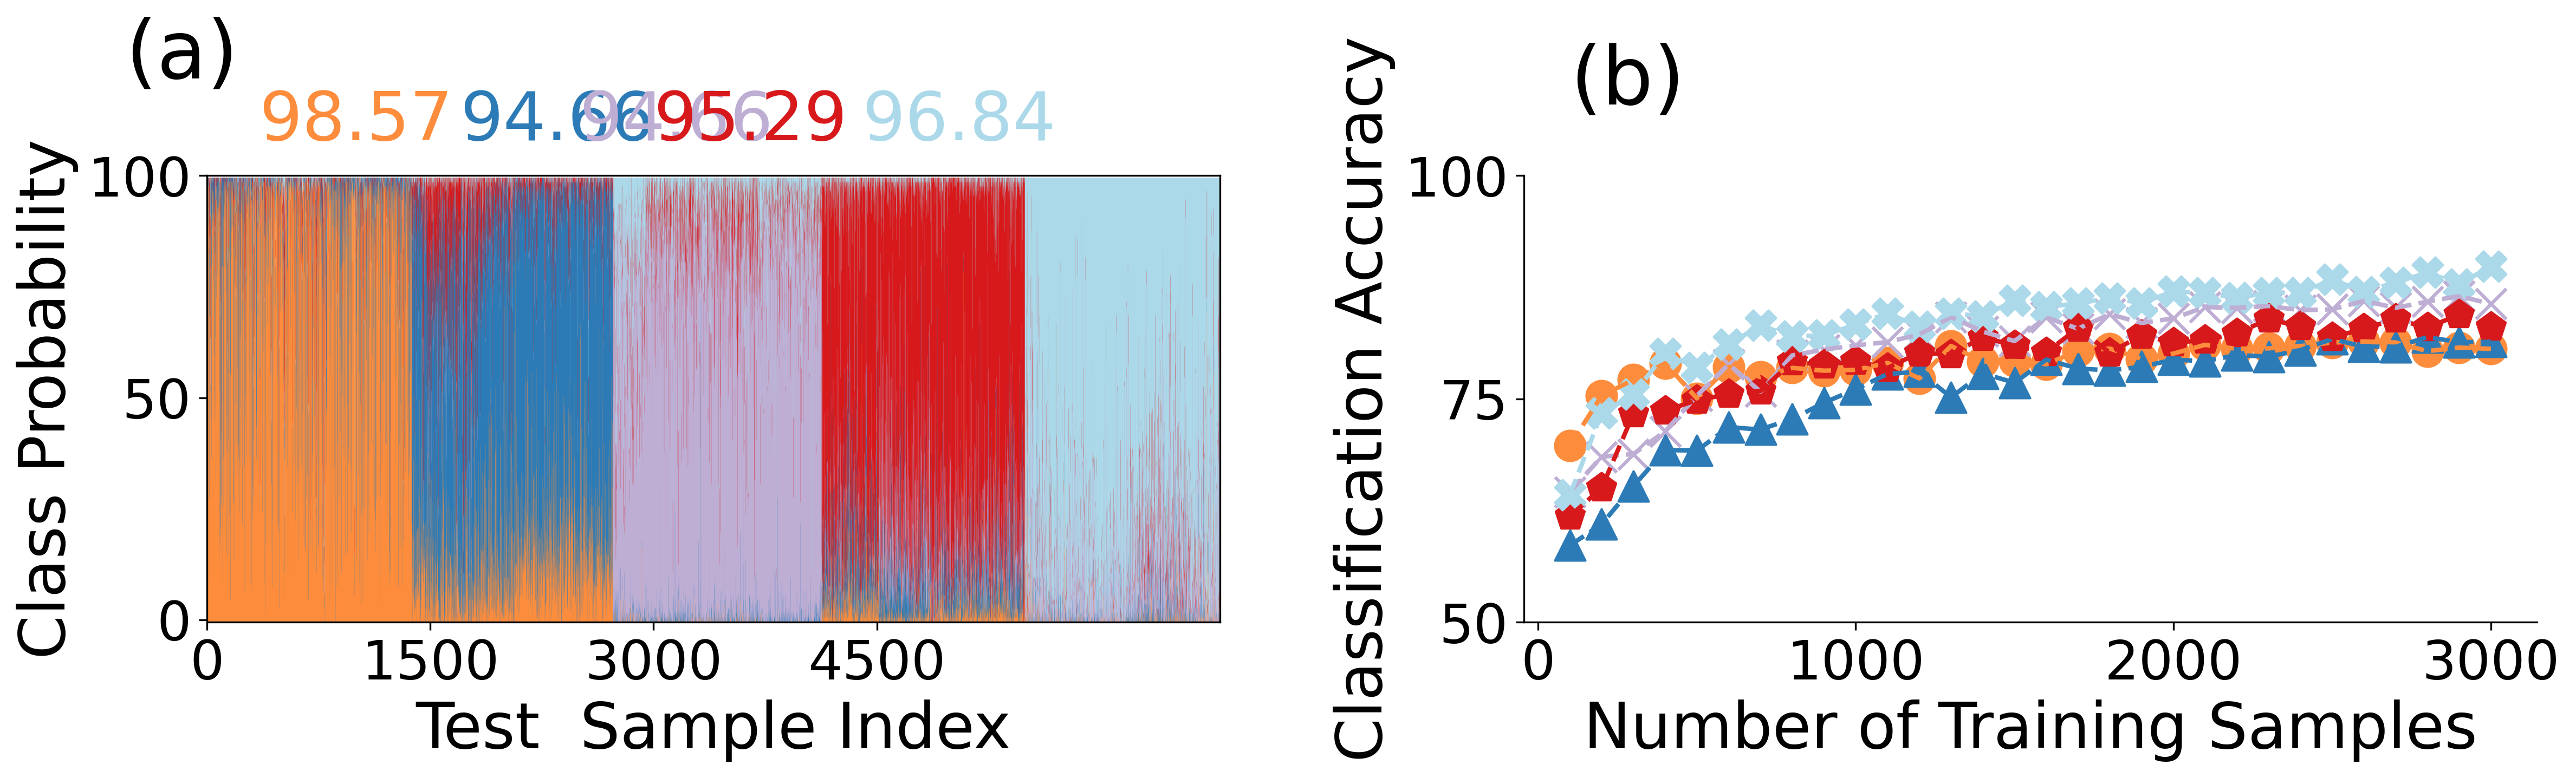

In [11]:
mar_slide,mar_dflow,mar_eflow,mar_complex,mar_fall='o','^','x','p','X'

lw,p,s=2,30,180
labelsize=28
fig=plt.figure(dpi=300)
fig.set_size_inches(18.5, 12.5)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=1.5)

plt.subplot(221)
cm = mpl.colors.ListedColormap([color_slide,color_dflow,color_eflow,color_complex,color_fall])

pcm=plt.imshow(image_italy_corrected,aspect='auto',cmap=cm,origin='lower')


plt.ylabel('Class Probability',fontsize=labelsize)
plt.xlabel('Test  Sample Index',fontsize=labelsize)

#plt.text(400,158,'Slide',fontsize=26)
plt.text(350,108,'98.57',fontsize=30,color=color_slide)

#plt.text(1800,158,'DFlow',fontsize=26)
plt.text(1700,108,'94.66',fontsize=30,color=color_dflow)

#plt.text(1800,158,'EFlow',fontsize=26)
plt.text(2500,108,'94.66',fontsize=30,color=color_eflow)

#plt.text(2800,158,'Complex',fontsize=26)
plt.text(3000,108,'95.29',fontsize=30,color=color_complex)

#plt.text(4550,158,'Fall',fontsize=26)
plt.text(4400,108,'96.84',fontsize=30,color=color_fall)
plt.yticks([0,50,100])
plt.xticks([0,1500,3000,4500])
plt.text(-550,122,'(a)',fontsize=36)

plt.subplot(222)
samples=np.arange(100,10000,100)

plt.scatter(samples[0:p],ACC_slide_italy[0:p],marker=mar_slide,s=s,color=color_slide)
plt.scatter(samples[0:p],ACC_dflow_italy[0:p],marker=mar_dflow,s=s,color=color_dflow)
plt.scatter(samples[0:p],ACC_eflow_italy[0:p],marker=mar_eflow,s=s,color=color_eflow)
plt.scatter(samples[0:p],ACC_complex_italy[0:p],marker=mar_complex,s=s,color=color_complex)
plt.scatter(samples[0:p],ACC_fall_italy[0:p],s=s,marker=mar_fall,color=color_fall)


plt.plot(samples[0:p],ACC_slide_italy[0:p],lw=lw,ls='--',color=color_slide)
plt.plot(samples[0:p],ACC_dflow_italy[0:p],lw=lw,ls='--',color=color_dflow)
plt.plot(samples[0:p],ACC_eflow_italy[0:p],lw=lw,ls='--',color=color_eflow)
plt.plot(samples[0:p],ACC_complex_italy[0:p],lw=lw,ls='--',color=color_complex)
plt.plot(samples[0:p],ACC_fall_italy[0:p],lw=lw,ls='--',color=color_fall)

plt.xlabel('Number of Training Samples',fontsize=labelsize)
plt.ylabel('Classification Accuracy',fontsize=labelsize)
#plt.xlim(50,10000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks([50,75,100])
plt.text(100,108,'(b)',fontsize=36)